In [1]:
using Catlab

# 1. The Graph Schema

### To use the visualization function define in Catlab.jl, we use the pre-built graph schema of "SchGraph" in Catlab.jl. The SchGraph schema is:

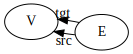

In [4]:
to_graphviz(SchGraph)

# 2. Define Graph instances

## 2.1 Graph instance A, note it is a functor G: SchGraph -> FinSet

In [5]:
g_A = @acset Graph begin
    V = 3
    E = 3
    src = [1, 2, 3]
    tgt = [2, 3, 3]
end

E,src,tgt
1,1,2
2,2,3
3,3,3


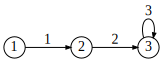

In [6]:
to_graphviz(g_A; node_labels=true, edge_labels=true)

## 2.2 Graph instance B, a functor H: SchGraph -> FinSet

In [7]:
g_B = @acset Graph begin
    V = 4
    E = 6
    src = [1, 2, 3, 3, 3, 4]
    tgt = [2, 3, 3, 2, 1, 3]
end

E,src,tgt
1,1,2
2,2,3
3,3,3
4,3,2
5,3,1
6,4,3


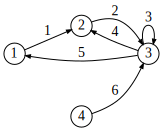

In [8]:
to_graphviz(g_B; node_labels=true, edge_labels=true)

### 2.2.1 Method 1 of define the graph homomorphism:
### Manually define the homomorphism as natural transformation from functor of Graph A to functor of Graph B1. To better understand the math, please refer to the book "Seven Sketches" Chapter 3.3.5

# ACSetTransformation is a type that is very generic (could be "database-like homomorphism"), but can specify the model category to use.
# Homomorphism search, can specify the model category.  This is a wrapper around a named tuple; what model category using imposes 
#   requirements for what must be specified, or how to interpret it. (e.g., CPar could allow "0" elements in the FinFunctions).

In [9]:
α = ACSetTransformation(g_A, g_B,
    V = [1,2,3],
    E = [1,2,3]) 

ACSetTransformation((V = FinFunction([1, 2, 3], FinSet(4)), E = FinFunction([1, 2, 3], FinSet(6))), )

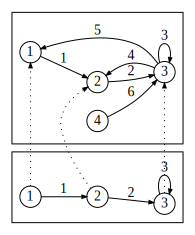

In [10]:
to_graphviz(α; node_labels=true, edge_labels=true, draw_codom=true)

### check the naturality:

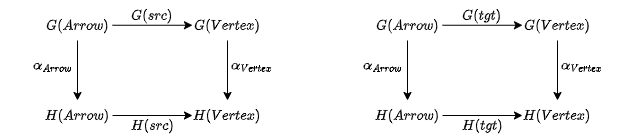

### 2.2.1.1 the built-in function of checking naturality in Catlab.jl:

In [11]:
is_natural(α)

true

### 2.2.2 Method 2, using build-in function to generate homomorphims:
### the function "homomorphisms" 's default setting can out all the possible homomorphisms

In [12]:
homomorphisms(g_A, g_B)

5-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 2, 3], FinSet(4)), E = FinFunction([1, 2, 3], FinSet(6))), )
 ACSetTransformation((V = FinFunction([3, 2, 3], FinSet(4)), E = FinFunction([4, 2, 3], FinSet(6))), )
 ACSetTransformation((V = FinFunction([2, 3, 3], FinSet(4)), E = FinFunction([2, 3, 3], FinSet(6))), )
 ACSetTransformation((V = FinFunction([3, 3, 3], FinSet(4)), E = FinFunction([3, 3, 3], FinSet(6))), )
 ACSetTransformation((V = FinFunction([4, 3, 3], FinSet(4)), E = FinFunction([6, 3, 3], FinSet(6))), )

### By way of visually enumerating these possible homomomorphisms, we now plot out the graph homomorphisms

### [#1]

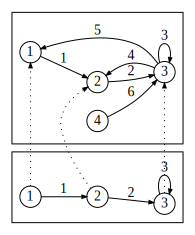

In [13]:
to_graphviz(homomorphisms(g_A, g_B)[1]; node_labels=true, edge_labels=true, draw_codom=true)

### [2]

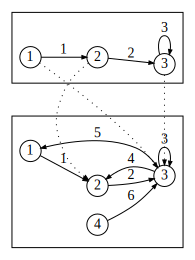

In [14]:
to_graphviz(homomorphisms(g_A, g_B)[2]; node_labels=true, edge_labels=true, draw_codom=true)

### [3]

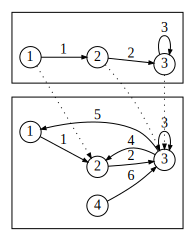

In [15]:
to_graphviz(homomorphisms(g_A, g_B)[3]; node_labels=true, edge_labels=true, draw_codom=true)

### [4]

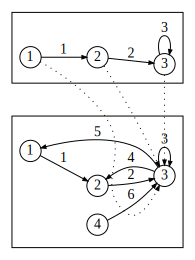

In [16]:
to_graphviz(homomorphisms(g_A, g_B)[4]; node_labels=true, edge_labels=true, draw_codom=true)

### [5]

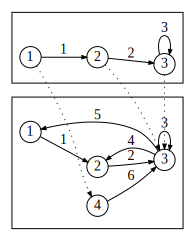

In [17]:
to_graphviz(homomorphisms(g_A, g_B)[5]; node_labels=true, edge_labels=true, draw_codom=true)

### Note, we can constrain the function of "homomorphisms" by conditions to generate the homomorphisms that we really want.
### for example, if use "monic = true", then it only return the homomorphisms as monomorphisms:

In [18]:
mono = homomorphisms(g_A, g_B; monic=true)

1-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 2, 3], FinSet(4)), E = FinFunction([1, 2, 3], FinSet(6))), )

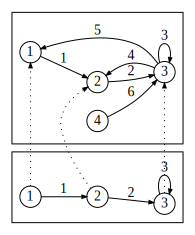

In [19]:
to_graphviz(mono[1]; node_labels=true, edge_labels=true, draw_codom=true)

### This is really the same homomorphism we just manually defined!

# The material below is for students interested in exploring more deeply, or upon request in the mini-course

In [20]:
g_degenerateWithReflexiveEdge = @acset Graph begin
    V = 1
    E = 1
    src = [1]
    tgt = [1]
end

E,src,tgt
1,1,1


In [21]:
to_graphviz(g_degenerateWithReflexiveEdge; node_labels=true, edge_labels=true)

In [22]:
homomorphisms(g_A, g_degenerateWithReflexiveEdge)

1-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 1, 1], FinSet(1)), E = FinFunction([1, 1, 1], FinSet(1))), )

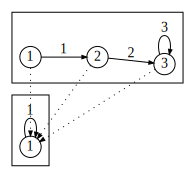

In [23]:
to_graphviz(homomorphism(g_A, g_degenerateWithReflexiveEdge); node_labels=true, edge_labels=true, draw_codom=true)

In [24]:
g_degenerateWithoutReflexiveEdge = @acset Graph begin
    V = 1
    E = 0
    src = []
    tgt = []
end

Graph {V:1, E:0}

In [25]:
to_graphviz(g_degenerateWithoutReflexiveEdge; node_labels=true, edge_labels=true)

In [26]:
homomorphisms(g_A, g_degenerateWithoutReflexiveEdge)

Any[]

## While there are always identity morphisms (self-edges) in a category, there are not automatically any reflexive edges in a graph!

## Recall our graph A

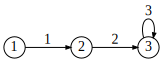

In [27]:
to_graphviz(g_A; node_labels=true, edge_labels=true)

## Now we define a graph with a two vertices, and a single edge betweenst them

In [28]:
g_connectedPair = @acset Graph begin
    V = 2
    E = 1
    src = [1]
    tgt = [2]
end

E,src,tgt
1,1,2


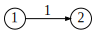

In [29]:
to_graphviz(g_connectedPair; node_labels=true, edge_labels=true)

## Now let's consider homomorphisms from this connected-pair graph into graph A!

In [30]:
homomorphisms(g_connectedPair, g_A)

3-element Vector{Any}:
 ACSetTransformation((V = FinFunction([1, 2], FinSet(3)), E = FinFunction([1], FinSet(3))), )
 ACSetTransformation((V = FinFunction([2, 3], FinSet(3)), E = FinFunction([2], FinSet(3))), )
 ACSetTransformation((V = FinFunction([3, 3], FinSet(3)), E = FinFunction([3], FinSet(3))), )

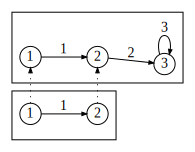

In [31]:
to_graphviz(homomorphisms(g_connectedPair, g_A)[1]; node_labels=true, edge_labels=true, draw_codom=true)

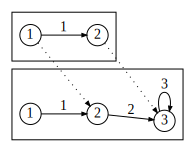

In [32]:
to_graphviz(homomorphisms(g_connectedPair, g_A)[2]; node_labels=true, edge_labels=true, draw_codom=true)

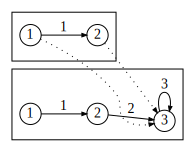

In [33]:
to_graphviz(homomorphisms(g_connectedPair, g_A)[3]; node_labels=true, edge_labels=true, draw_codom=true)

## NB: There is NO homomorphism from the connected-pair graph into vertices 1 & 3 -- that's because there is no transitivity that is imposed for the graph!  While the schema category of course has "transitivity" in the form of composition, that does *not* mean that the objects encoded as instances of that schema are transitive!